In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

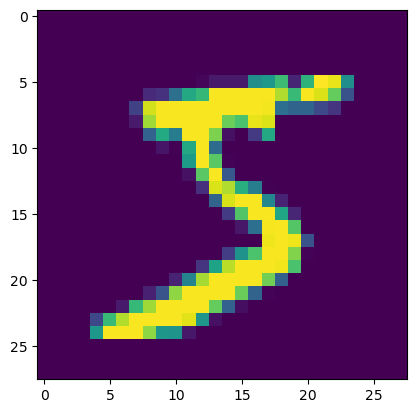

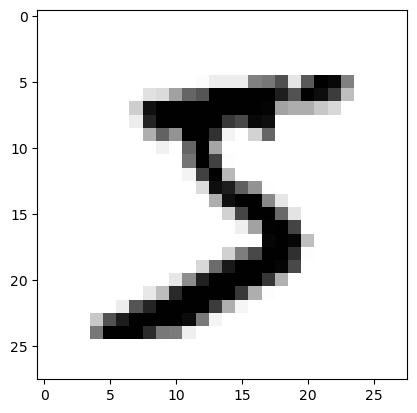

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

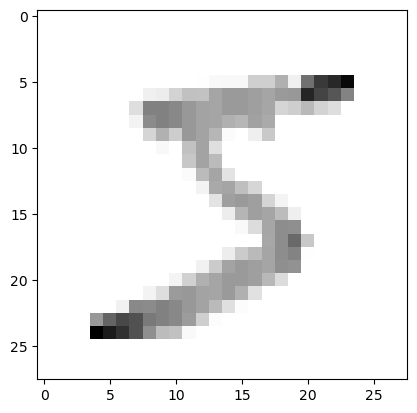

In [6]:
x_train = tf.keras.utils.normalize (x_train, axis=1)
x_test = tf.keras.utils.normalize (x_test , axis = 1)
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [7]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE , IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE , IMG_SIZE,1)
print("training dimentions" , x_trainr.shape)
print("testing dimentions" , x_testr.shape)

training dimentions (60000, 28, 28, 1)
testing dimentions (10000, 28, 28, 1)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation , Flatten , Conv2D ,MaxPooling2D

In [9]:
# Initialize a sequential model
model = Sequential()

# Add a 2D convolutional layer with 64 filters of size 3x3 and input shape of x_train
model.add(Conv2D(64, (3, 3), input_shape=x_train.shape[1:]))
# Apply the ReLU activation function to the output of the convolutional layer
model.add(Activation("relu"))
# Apply max pooling with a pool size of 2x2 to reduce spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 64 filters of size 3x3
model.add(Conv2D(64, (3, 3)))
# Apply the ReLU activation function to the output of the convolutional layer
model.add(Activation("relu"))
# Apply max pooling with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 64 filters of size 3x3
model.add(Conv2D(64, (3, 3)))
# Apply the ReLU activation function to the output of the convolutional layer
model.add(Activation("relu"))
# Apply max pooling with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 2D feature maps into a 1D vector
model.add(Flatten())

# Add a fully connected layer with 64 neurons
model.add(Dense(64))
# Apply the ReLU activation function to the output of the fully connected layer
model.add(Activation("relu"))

# Add another fully connected layer with 32 neurons
model.add(Dense(32))
# Apply the ReLU activation function to the output of the fully connected layer
model.add(Activation("relu"))

# Add the final fully connected layer with 10 neurons for the output classes
model.add(Dense(10))
# Apply the softmax activation function to obtain class probabilities
model.add(Activation('softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [11]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer = "adam" , metrics=['accuracy'])

In [12]:
model.fit(x_trainr, y_train ,epochs=5 , validation_split= 0.3)

Epoch 1/5
1313/1313 [==============================] - 24s 17ms/step - loss: 0.3292 - accuracy: 0.8965 - val_loss: 0.1215 - val_accuracy: 0.9623
Epoch 2/5
1313/1313 [==============================] - 24s 18ms/step - loss: 0.1022 - accuracy: 0.9692 - val_loss: 0.0990 - val_accuracy: 0.9708
Epoch 3/5
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0740 - accuracy: 0.9766 - val_loss: 0.0888 - val_accuracy: 0.9728
Epoch 4/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0585 - accuracy: 0.9818 - val_loss: 0.0779 - val_accuracy: 0.9777
Epoch 5/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0483 - accuracy: 0.9843 - val_loss: 0.0843 - val_accuracy: 0.9734


In [13]:
test_loss , test_acc = model.evaluate(x_testr,y_test)
print("test loss" , test_loss)
print("validation " , test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0787 - accuracy: 0.9777
test loss 0.07871276885271072
validation  0.9776999950408936


In [14]:
preditcions = model.predict([x_testr])
print(preditcions)

313/313 [==============================] - 2s 5ms/step
[[1.5923883e-09 4.3777385e-07 1.9413169e-07 ... 9.9999523e-01
  1.1917040e-10 1.9985764e-06]
 [6.5626488e-03 3.3397609e-04 9.9287629e-01 ... 4.0973449e-05
  6.5078370e-06 1.0199926e-05]
 [5.8175136e-08 9.9999750e-01 1.5095081e-07 ... 1.8543457e-06
  3.8966313e-08 7.2903276e-08]
 ...
 [1.5806337e-07 3.6368274e-06 3.0253442e-08 ... 5.9737893e-05
  5.4845870e-05 6.7906996e-04]
 [8.1122681e-07 4.9736838e-07 5.0578625e-10 ... 2.6313030e-09
  1.5060309e-05 1.8839911e-04]
 [1.1749608e-04 4.1902967e-06 4.5112483e-07 ... 3.2999854e-08
  1.1407290e-05 2.2021179e-05]]


In [16]:
import cv2
from PIL import ImageGrab
import time

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN


cap = ImageGrab.grab()
cap = cap.crop((400, 150, 1300, 950))
cap.save("screenshot.png")
cap = cv2.imread("screenshot.png")

text = "some text"
(text_width , text_height) = cv2.getTextSize(text , font, fontScale=font_scale , thickness=1)[0]
text_offset_x=10
text_offset_y=cap.shape[0]-25

box_coords = ((text_offset_x,text_offset_y),(text_offset_x+text_width+2 , text_offset_y - text_offset_y -2))

cntr =0;
while True:
    cap = ImageGrab.grab()
    cap = cap.crop((400, 150, 1300, 950))
    cap.save("screenshot.png")
    cap = cv2.imread("screenshot.png")
    
    frame = cap
    time.sleep(1)
    
    cntr = cntr+1
    if (cntr%2 == 0):
        gray = cv2.cvtColor(frame , cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray , (28,28),interpolation= cv2.INTER_AREA)
        newimg = tf.keras.utils.normalize(resized , axis=1)
        newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)
        preditcions = model.predict(newimg)
        status = np.argmax(preditcions)
        print(status)
        print(type(status))
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame , (x1,x1),(x1+w1,y1+h1) , (0,0,0) , -1)
        cv2.putText(frame , status.astype(str) , (x1+int(w1/5),y1+int(h1/2)) , cv2.FONT_HERSHEY_SIMPLEX , .7 ,(0,0,225) ,2 )
        
        cv2.imshow('handwritten digits' , frame)
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
            
cv2.destroyAllWindows()

1/1 [==============================] - 0s 74ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
0
<class 'numpy.int64'>
1/1 [==============================] - 0s 17ms/step
0
<class 'numpy.int64'>
